# Import Necessary Libraries

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Part1: Dataset Loading & Preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# 1. Load the dataset and display the first 5 rows.
df = pd.read_csv('/content/drive/MyDrive/graduate_admission_dataset(1).csv')
print(df.head())

# 2. Select the chance of admit as the target variable (y) and use all other features as the input features (X).
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

# 3. Standardize the features using the standard scaler.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split the dataset into train (60%), validation (20%), and test (20%) sets with random state 42
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Convert y_test to a NumPy array for correct indexing
y_test = y_test.to_numpy()


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


# Part 2: Build and Compile the Neural Network Model

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.5468 - val_loss: 1.4146
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1079 - val_loss: 0.4611
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3595 - val_loss: 0.1789
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1535 - val_loss: 0.1054
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0866 - val_loss: 0.0884
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0760 - val_loss: 0.0617
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0451 - val_loss: 0.0526
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0393 - val_loss: 0.0453
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0345 - val_loss: 0.0397
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0276 - val_loss: 0.0350
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0269 - val_loss: 0.0311
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0222 - val_loss: 0.0281

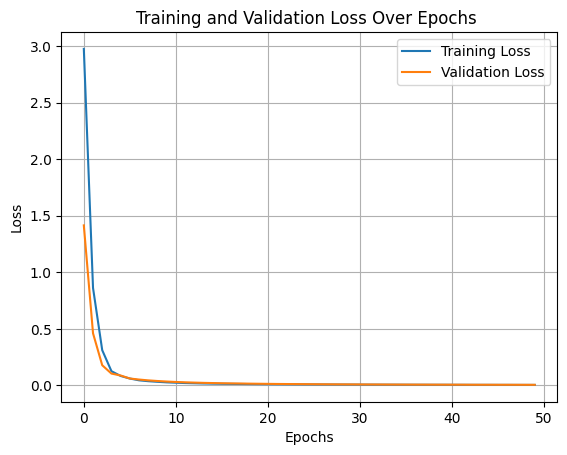

In [30]:
# 1. Complete the function build_model to build a simple feedforward neural network with the following architecture:
# • Input layer: Based on the number of features in the dataset.
# • Hidden layer: 10 neurons with the ReLU activation function.
# • Output layer: A single neuron with a linear activation function for regression.

def build_model():
    model = Sequential()
    model.add(Dense(10, activation='relu',input_dim=X_train.shape[1] ))
    model.add(Dense(1, activation='linear'))


    # 2. Compile the model using Mean Squared Error (MSE) as the loss function and the Adam optimizer with a learning rate of 0.01.

    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
    return model

# 3. Train the model using the training set and validate on the validation set with 50 epochs and batch size 32.
model = build_model()
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Part 3: Evaluation Using Cross-Validation

In [26]:
# 1. Perform 5-fold cross-validation on the test set.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics for each fold
fold_mse = []
fold_mae = []
fold_r2 = []

for train_index, test_index in kf.split(X_test):
    X_fold_train, X_fold_test = X_test[train_index], X_test[test_index]
    y_fold_train, y_fold_test = y_test[train_index], y_test[test_index]



    # Train the model on the training fold
    model = build_model()  # Create a new model for each fold
    model.fit(X_fold_train, y_fold_train, epochs=50, batch_size=32, verbose=0)  # Train on the training fold


    # Make predictions on the test fold
    y_pred = model.predict(X_fold_test)

    # 2. For each fold, evaluate the model using the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² score.
    mse = mean_squared_error(y_fold_test, y_pred)
    mae = mean_absolute_error(y_fold_test, y_pred)
    r2 = r2_score(y_fold_test, y_pred)

    fold_mse.append(mse)
    fold_mae.append(mae)
    fold_r2.append(r2)


# 3. Report the average MAE, MSE, and R² for the test set.
print("LR=0.01 and batch size=32")
print("Average MSE across folds:", np.mean(fold_mse))
print("Average MAE across folds:", np.mean(fold_mae))
print("Average R² across folds:", np.mean(fold_r2))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
LR=0.01 and batch size=32
Average MSE across folds: 0.02605137974181109
Average MAE across folds: 0.13184069597125053
Average R² across folds: -0.3001517723133986
